<a href="https://colab.research.google.com/github/shirishahsharon/Bike_Sharing_Demand_Prediction/blob/main/Bike_Sharing_Deamd_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Business Understanding**:                                                  by

SEOUL Bike sharing demand prediction
Problem Description:- Currently rental bikes are introduced in many urban cities for the enhancement of mobility comfort.It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time.Eventually,providing the city with a stable supply of rental bikes becomes a major concern.The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
DATA DESCRIPTION:- The dataset contains weather information, the number of bikes rented per hour and date information.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegressio
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Loading data set and reading the data to understand explanation about features and data points/records.
df=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding ='iso-8859-1')
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [ ]:
# Checking the shape of the dataset : number of rows and number of columns
df.shape

(8760, 14)

In [ ]:
# Checking the total number fo data points or values in the data set
df.size

122640

In [ ]:
# Checking first 5 rows of data set
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# Checking last 5 rows of the data set
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [ ]:
# Checking five random rows of the data set
df.sample(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
5464  16/07/2018                818    16             33.3           46   
437   19/12/2017                 55     5             -3.9           66   
7298  01/10/2018                262     2             13.9           56   
85    04/12/2017                391    13              0.0           30   
3558  28/04/2018                230     6             10.6           84   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
5464               3.1              1914                       20.1   
437                0.7              1209                       -9.3   
7298               2.4              2000                        5.2   
85                 5.4              1938                      -15.5   
3558               1.1               284                        8.0   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
5464                     2.51           0.0            0.0  Summer   
437                      0.00           0.0            2.6  Winter   
7298                     0.00           0.0            0.0  Autumn   
85                       1.17           0.0            0.0  Winter   
3558                     0.00           0.0            0.0  Spring   

         Holiday Functioning Day  
5464  No Holiday             Yes  
437   No Holiday             Yes  
7298  No Holiday             Yes  
85    No Holiday             Yes  
3558  No Holiday             Yes

In [ ]:
# Understanding the data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# printing unique values of columns to understand the features
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
# descrpitive statistical data of numerical columns
df.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

In [ ]:
# Checking the correlation between variables
df.corr()

Rented Bike Count      Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  0.410257         0.538558   
Hour                                0.410257  1.000000         0.124114   
Temperature(°C)                     0.538558  0.124114         1.000000   
Humidity(%)                        -0.199780 -0.241644         0.159371   
Wind speed (m/s)                    0.121108  0.285197        -0.036252   
Visibility (10m)                    0.199280  0.098753         0.034794   
Dew point temperature(°C)           0.379788  0.003054         0.912798   
Solar Radiation (MJ/m2)             0.261837  0.145131         0.353505   
Rainfall(mm)                       -0.123074  0.008715         0.050282   
Snowfall (cm)                      -0.141804 -0.021516        -0.218405   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count            -0.199780          0.121108          0.199280   
Hour                         -0.241644          0.285197          0.098753   
Temperature(°C)               0.159371         -0.036252          0.034794   
Humidity(%)                   1.000000         -0.336683         -0.543090   
Wind speed (m/s)             -0.336683          1.000000          0.171507   
Visibility (10m)             -0.543090          0.171507          1.000000   
Dew point temperature(°C)     0.536894         -0.176486         -0.176630   
Solar Radiation (MJ/m2)      -0.461919          0.332274          0.149738   
Rainfall(mm)                  0.236397         -0.019674         -0.167629   
Snowfall (cm)                 0.108183         -0.003554         -0.121695   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Hour                                        0.003054                 0.145131   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   

                           Rainfall(mm)  Snowfall (cm)  
Rented Bike Count             -0.123074      -0.141804  
Hour                           0.008715      -0.021516  
Temperature(°C)                0.050282      -0.218405  
Humidity(%)                    0.236397       0.108183  
Wind speed (m/s)              -0.019674      -0.003554  
Visibility (10m)              -0.167629      -0.121695  
Dew point temperature(°C)      0.125597      -0.150887  
Solar Radiation (MJ/m2)       -0.074290      -0.072301  
Rainfall(mm)                   1.000000       0.008500  
Snowfall (cm)                  0.008500       1.000000


### **Pre-processing the dataset**

In [ ]:
# Check for missing values in each column
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Checking for presence of any duplicate values
len(df[df.duplicated])

0

In [ ]:
# Modifying Date format to make it user friendly(To analyse the impact of month and days on dependent variable)
df['Date'] = df['Date'].apply(lambda x:
                                   dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [ ]:
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  year  month     day  
0     No Holiday             Yes  2017     12  Friday  
1     No Holiday             Yes  2017     12  Friday  
2     No Holiday             Yes  2017     12  Friday  
3     No Holiday             Yes  2017     12  Friday  
4     No Holiday             Yes  2017     12  Friday  
...          ...             ...   ...    ...     ...  
8755  No Holiday             Yes  2018     11  Friday  
8756  No Holiday             Yes  2018     11  Friday  
8757  No Holiday             Yes  2018     11  Friday  
8758  No Holiday             Yes  2018     11  Friday  
8759  No Holiday             Yes  2018     11  Friday  

[8760 rows x 17 columns]

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
df['weekdays_weekend'] = df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

df = df.drop(columns=['Date','day','year'],axis=1)

In [ ]:
df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
0              0.0            0.0  Winter  No Holiday             Yes     12   
1              0.0            0.0  Winter  No Holiday             Yes     12   
2              0.0            0.0  Winter  No Holiday             Yes     12   
3              0.0            0.0  Winter  No Holiday             Yes     12   
4              0.0            0.0  Winter  No Holiday             Yes     12   
...            ...            ...     ...         ...             ...    ...   
8755           0.0            0.0  Autumn  No Holiday             Yes     11   
8756           0.0            0.0  Autumn  No Holiday             Yes     11   
8757           0.0            0.0  Autumn  No Holiday             Yes     11   
8758           0.0            0.0  Autumn  No Holiday             Yes     11   
8759           0.0            0.0  Autumn  No Holiday             Yes     11   

      weekdays_weekend  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
8755                 0  
8756                 0  
8757                 0  
8758                 0  
8759                 0  

[8760 rows x 15 columns]

In [ ]:
# Checking the data types after modification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

In [ ]:
# Checking first 5 rows data
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
0           0.0            0.0  Winter  No Holiday             Yes     12   
1           0.0            0.0  Winter  No Holiday             Yes     12   
2           0.0            0.0  Winter  No Holiday             Yes     12   
3           0.0            0.0  Winter  No Holiday             Yes     12   
4           0.0            0.0  Winter  No Holiday             Yes     12   

   weekdays_weekend  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [ ]:
df.sample(5)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
1158                107     6              2.2           82               2.0   
1449                254     9             -9.9           49               0.8   
3184               1273    16             18.8           23               4.2   
8085               1146    21             10.8           57               2.0   
4029                 18    21             20.5           97               1.1   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
1158               211                       -0.5                     0.00   
1449              1624                      -18.6                     0.20   
3184              1956                       -2.7                     2.39   
8085              1219                        2.6                     0.00   
4029               726                       20.0                     0.00   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
1158           0.0            0.0  Winter  No Holiday             Yes      1   
1449           0.0            0.0  Winter  No Holiday             Yes      1   
3184           0.0            0.0  Spring  No Holiday             Yes      4   
8085           0.0            0.0  Autumn  No Holiday             Yes     11   
4029           4.0            0.0  Spring  No Holiday             Yes      5   

      weekdays_weekend  
1158                 0  
1449                 0  
3184                 0  
8085                 0  
4029                 0

In [ ]:
# Checking the value counts of new column
df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

In [ ]:
# Checking unique values
df.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
month                          12
weekdays_weekend                2
dtype: int64

In [ ]:
#Change the int64 column into catagory column
cols = ['Hour','month','weekdays_weekend']
for col in cols:
  df[col] =df[col].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  month                      8760 n

In [ ]:
df['weekdays_weekend'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekdays_weekend'],
      dtype='object')


## **EDA - Univariate Analysis**

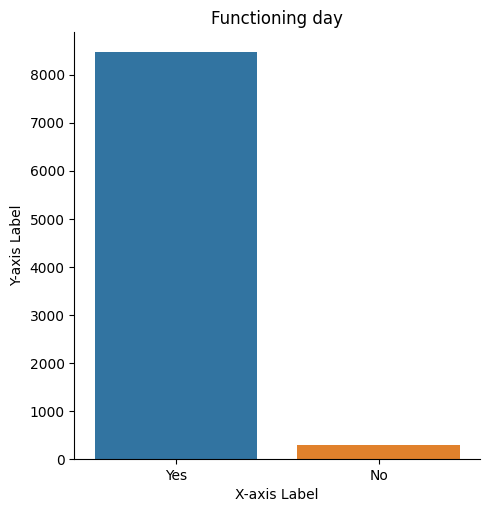

In [ ]:
# Create a categorical plot using catplot
sns.catplot(x="Functioning Day", data=df, kind="count")

# Add labels and titles (optional)
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Functioning day")

# Show the plot
plt.show()


Text(0.5, 1.0, 'Pie chart for Holiday')

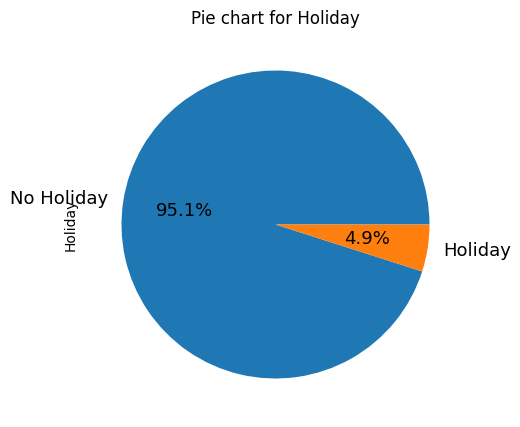

In [ ]:
df['Holiday'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(5,5),fontsize=13)
plt.title('Pie chart for Holiday')

Text(0.5, 1.0, 'Pie chart for Seasons')

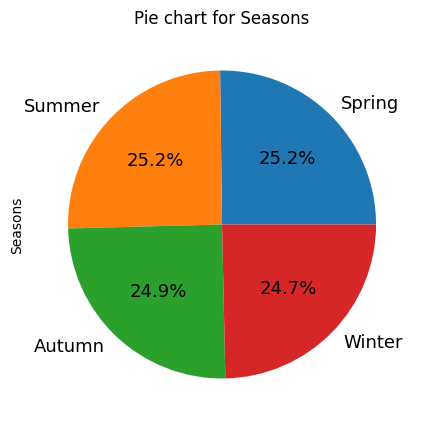

In [ ]:
df['Seasons'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(5,5),fontsize=13)
plt.title('Pie chart for Seasons')

[Text(0.5, 1.0, 'Rented bikes - Month wise demand ')]

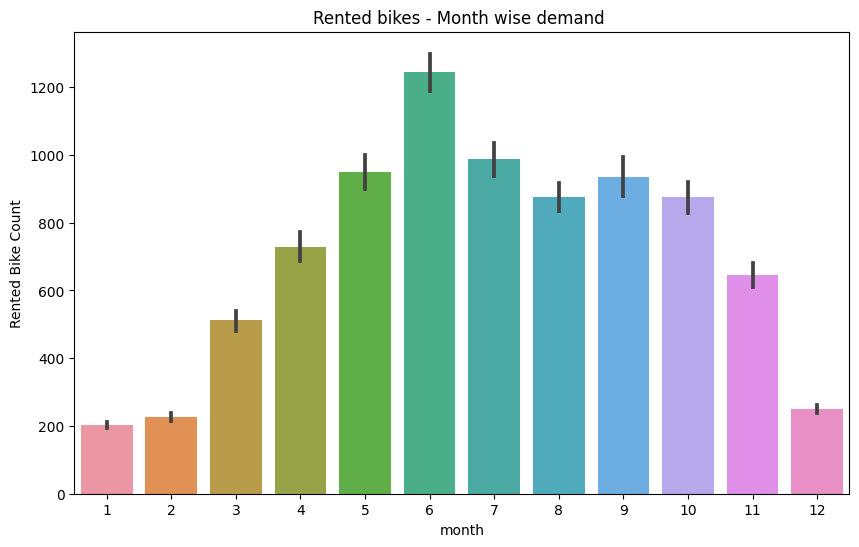

In [ ]:
# Data by vizualisation
fig,ax = plt.subplots(figsize = (10,6))
sns.barplot(data = df,x ='month',y = 'Rented Bike Count')
ax.set(title = 'Rented bikes - Month wise demand ')

[Text(0.5, 1.0, 'Rented bikes - Weekdays and weekend demand ')]

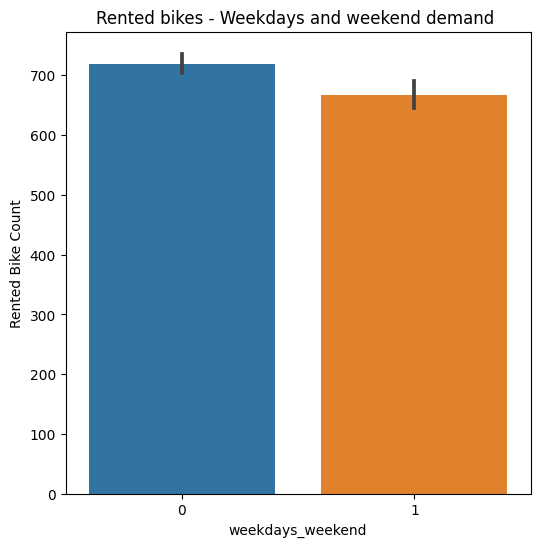

In [ ]:
fig,ax = plt.subplots(figsize = (6,6))
sns.barplot(data = df,x ='weekdays_weekend',y = 'Rented Bike Count')
ax.set(title = 'Rented bikes - Weekdays and weekend demand ')

[Text(0.5, 1.0, 'Count of Rented bikes during weekdays_weekend ')]

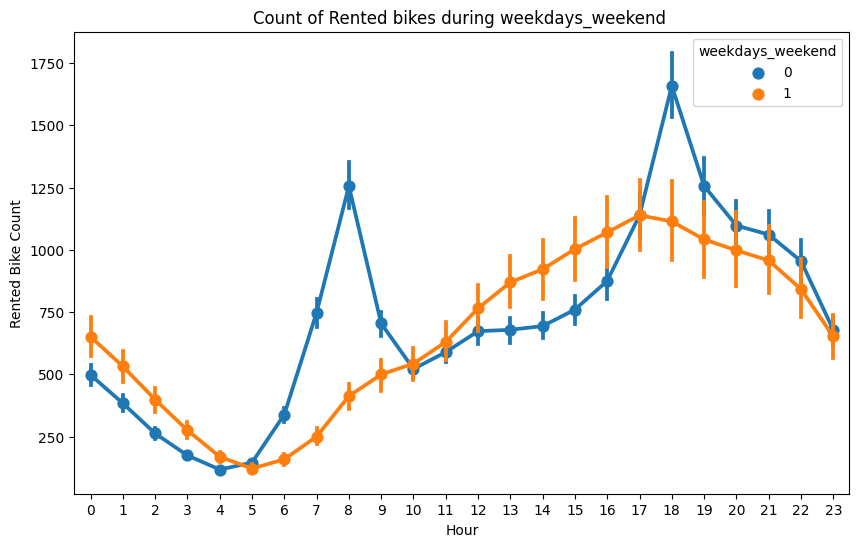

In [ ]:
#anlysis of data by vizualisation
fig,ax = plt.subplots(figsize = (10,6))
sns.pointplot(data = df,x='Hour',y='Rented Bike Count',hue = 'weekdays_weekend',ax = ax)
ax.set(title = 'Count of Rented bikes during weekdays_weekend ')

[Text(0.5, 1.0, 'Count of Rented bikes during weekdays_weekend ')]

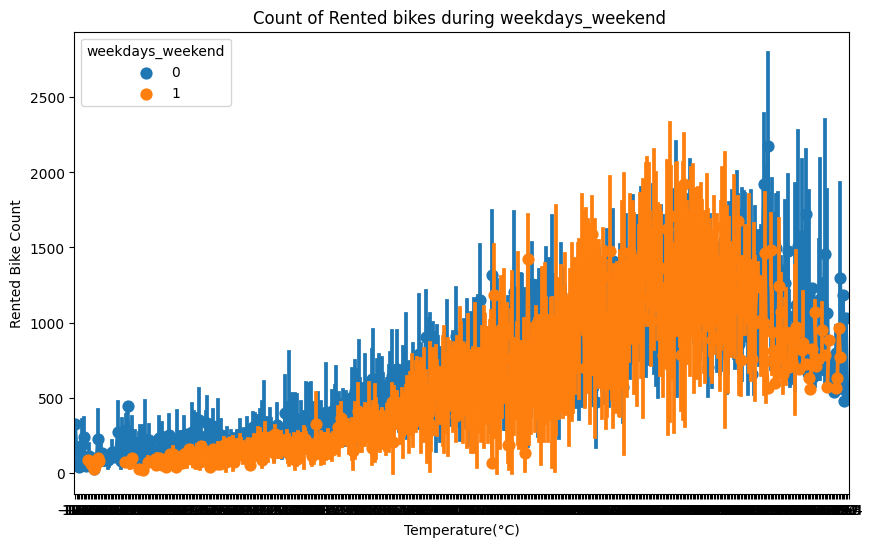

In [ ]:
fig,ax = plt.subplots(figsize = (10,6))
sns.pointplot(data = df,x='Temperature(°C)',y='Rented Bike Count',hue = 'weekdays_weekend',ax = ax)
ax.set(title = 'Count of Rented bikes during weekdays_weekend ')

In [ ]:
# numerical variables
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

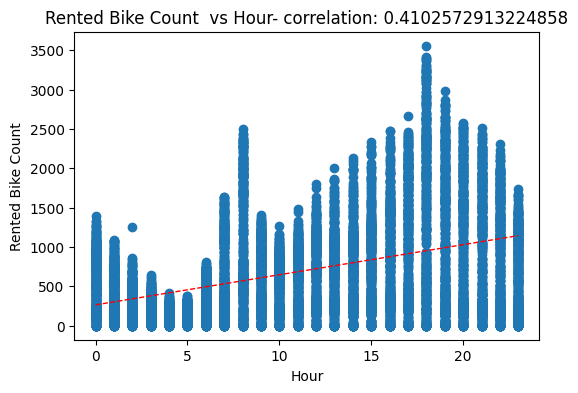

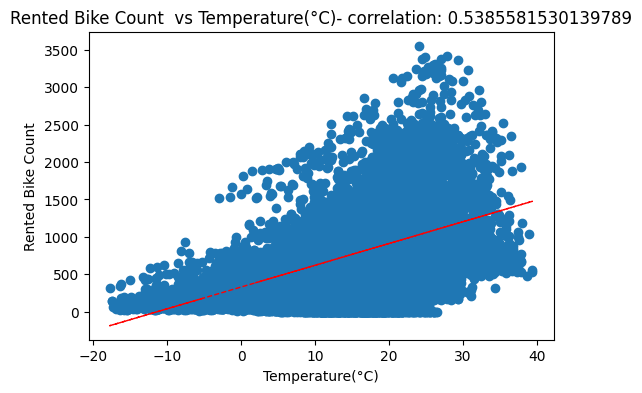

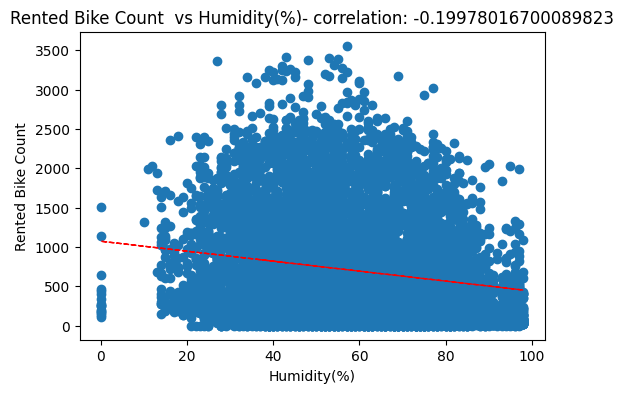

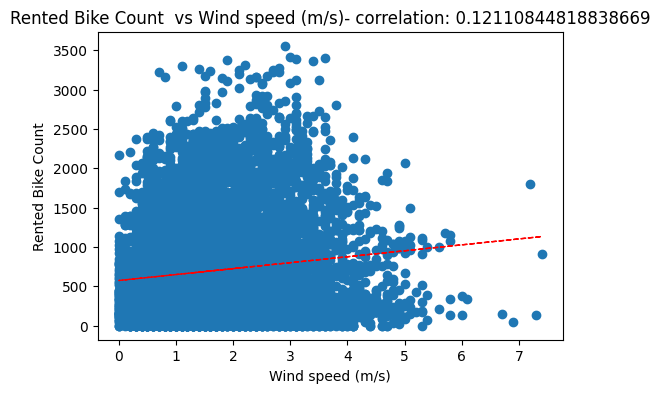

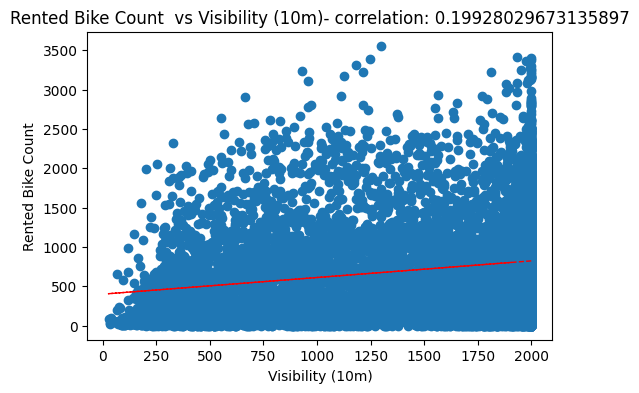

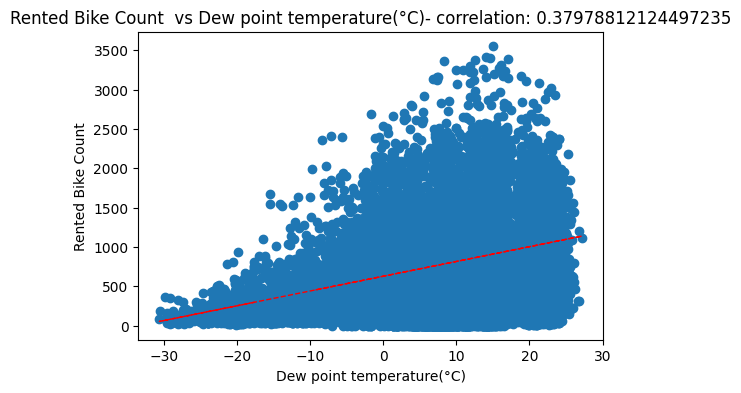

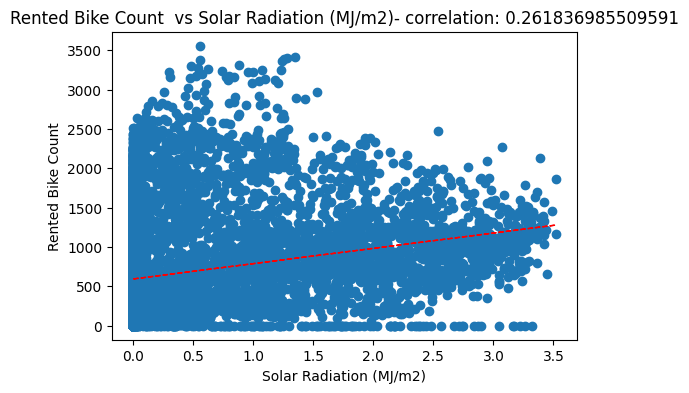

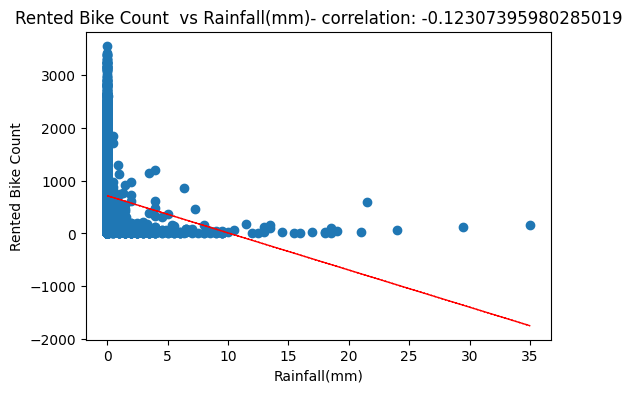

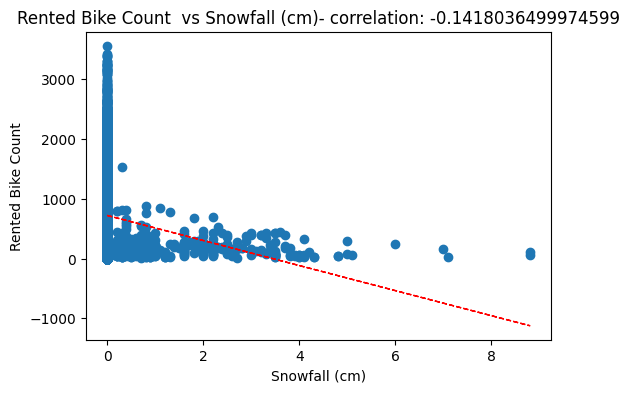

In [ ]:
 # finding relationship bewtween target variable to each independent variable

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(6, 4))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count  vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])
    #plt.plot(df[col], color='red',y_hat, "r--", lw=1)
    plt.plot(df[col], y_hat, color='red', linestyle='--', lw=1)
    plt.show()

In [ ]:
df.head(1)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes

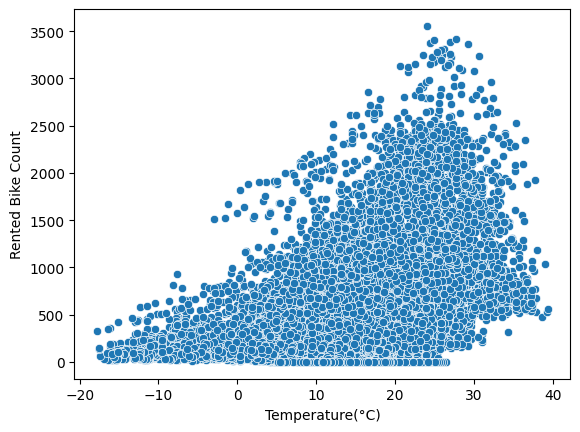

In [ ]:
sns.scatterplot(x=df["Temperature(°C)"],y=df["Rented Bike Count"]);

<Axes: xlabel='Temperature(°C)', ylabel='Dew point temperature(°C)'>

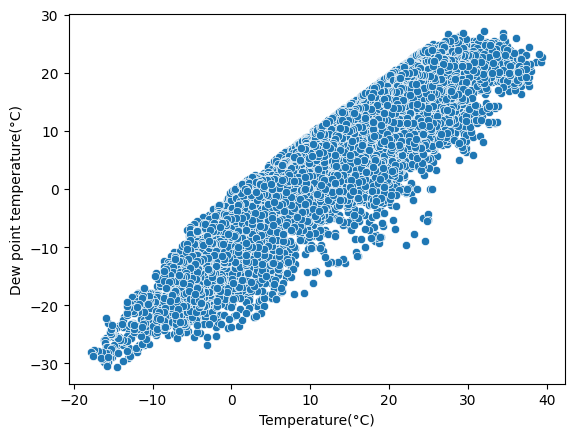

In [ ]:
sns.scatterplot(x=df["Temperature(°C)"],y=df["Dew point temperature(°C)"])

<Axes: xlabel='Dew point temperature(°C)', ylabel='Humidity(%)'>

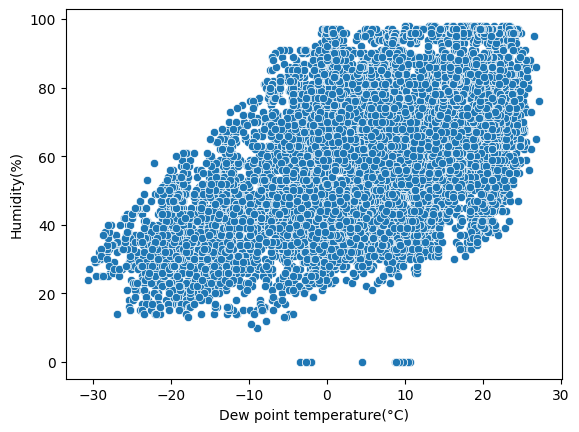

In [ ]:
sns.scatterplot(x=df["Dew point temperature(°C)"],y=df["Humidity(%)"])

<Axes: xlabel='Dew point temperature(°C)', ylabel='Temperature(°C)'>

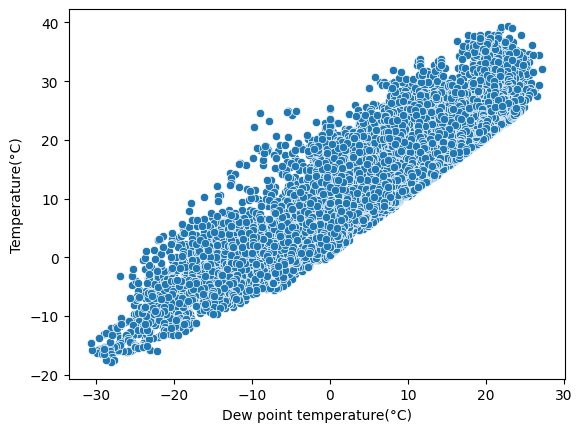

In [ ]:
sns.scatterplot(x=df["Dew point temperature(°C)"],y=df["Temperature(°C)"])

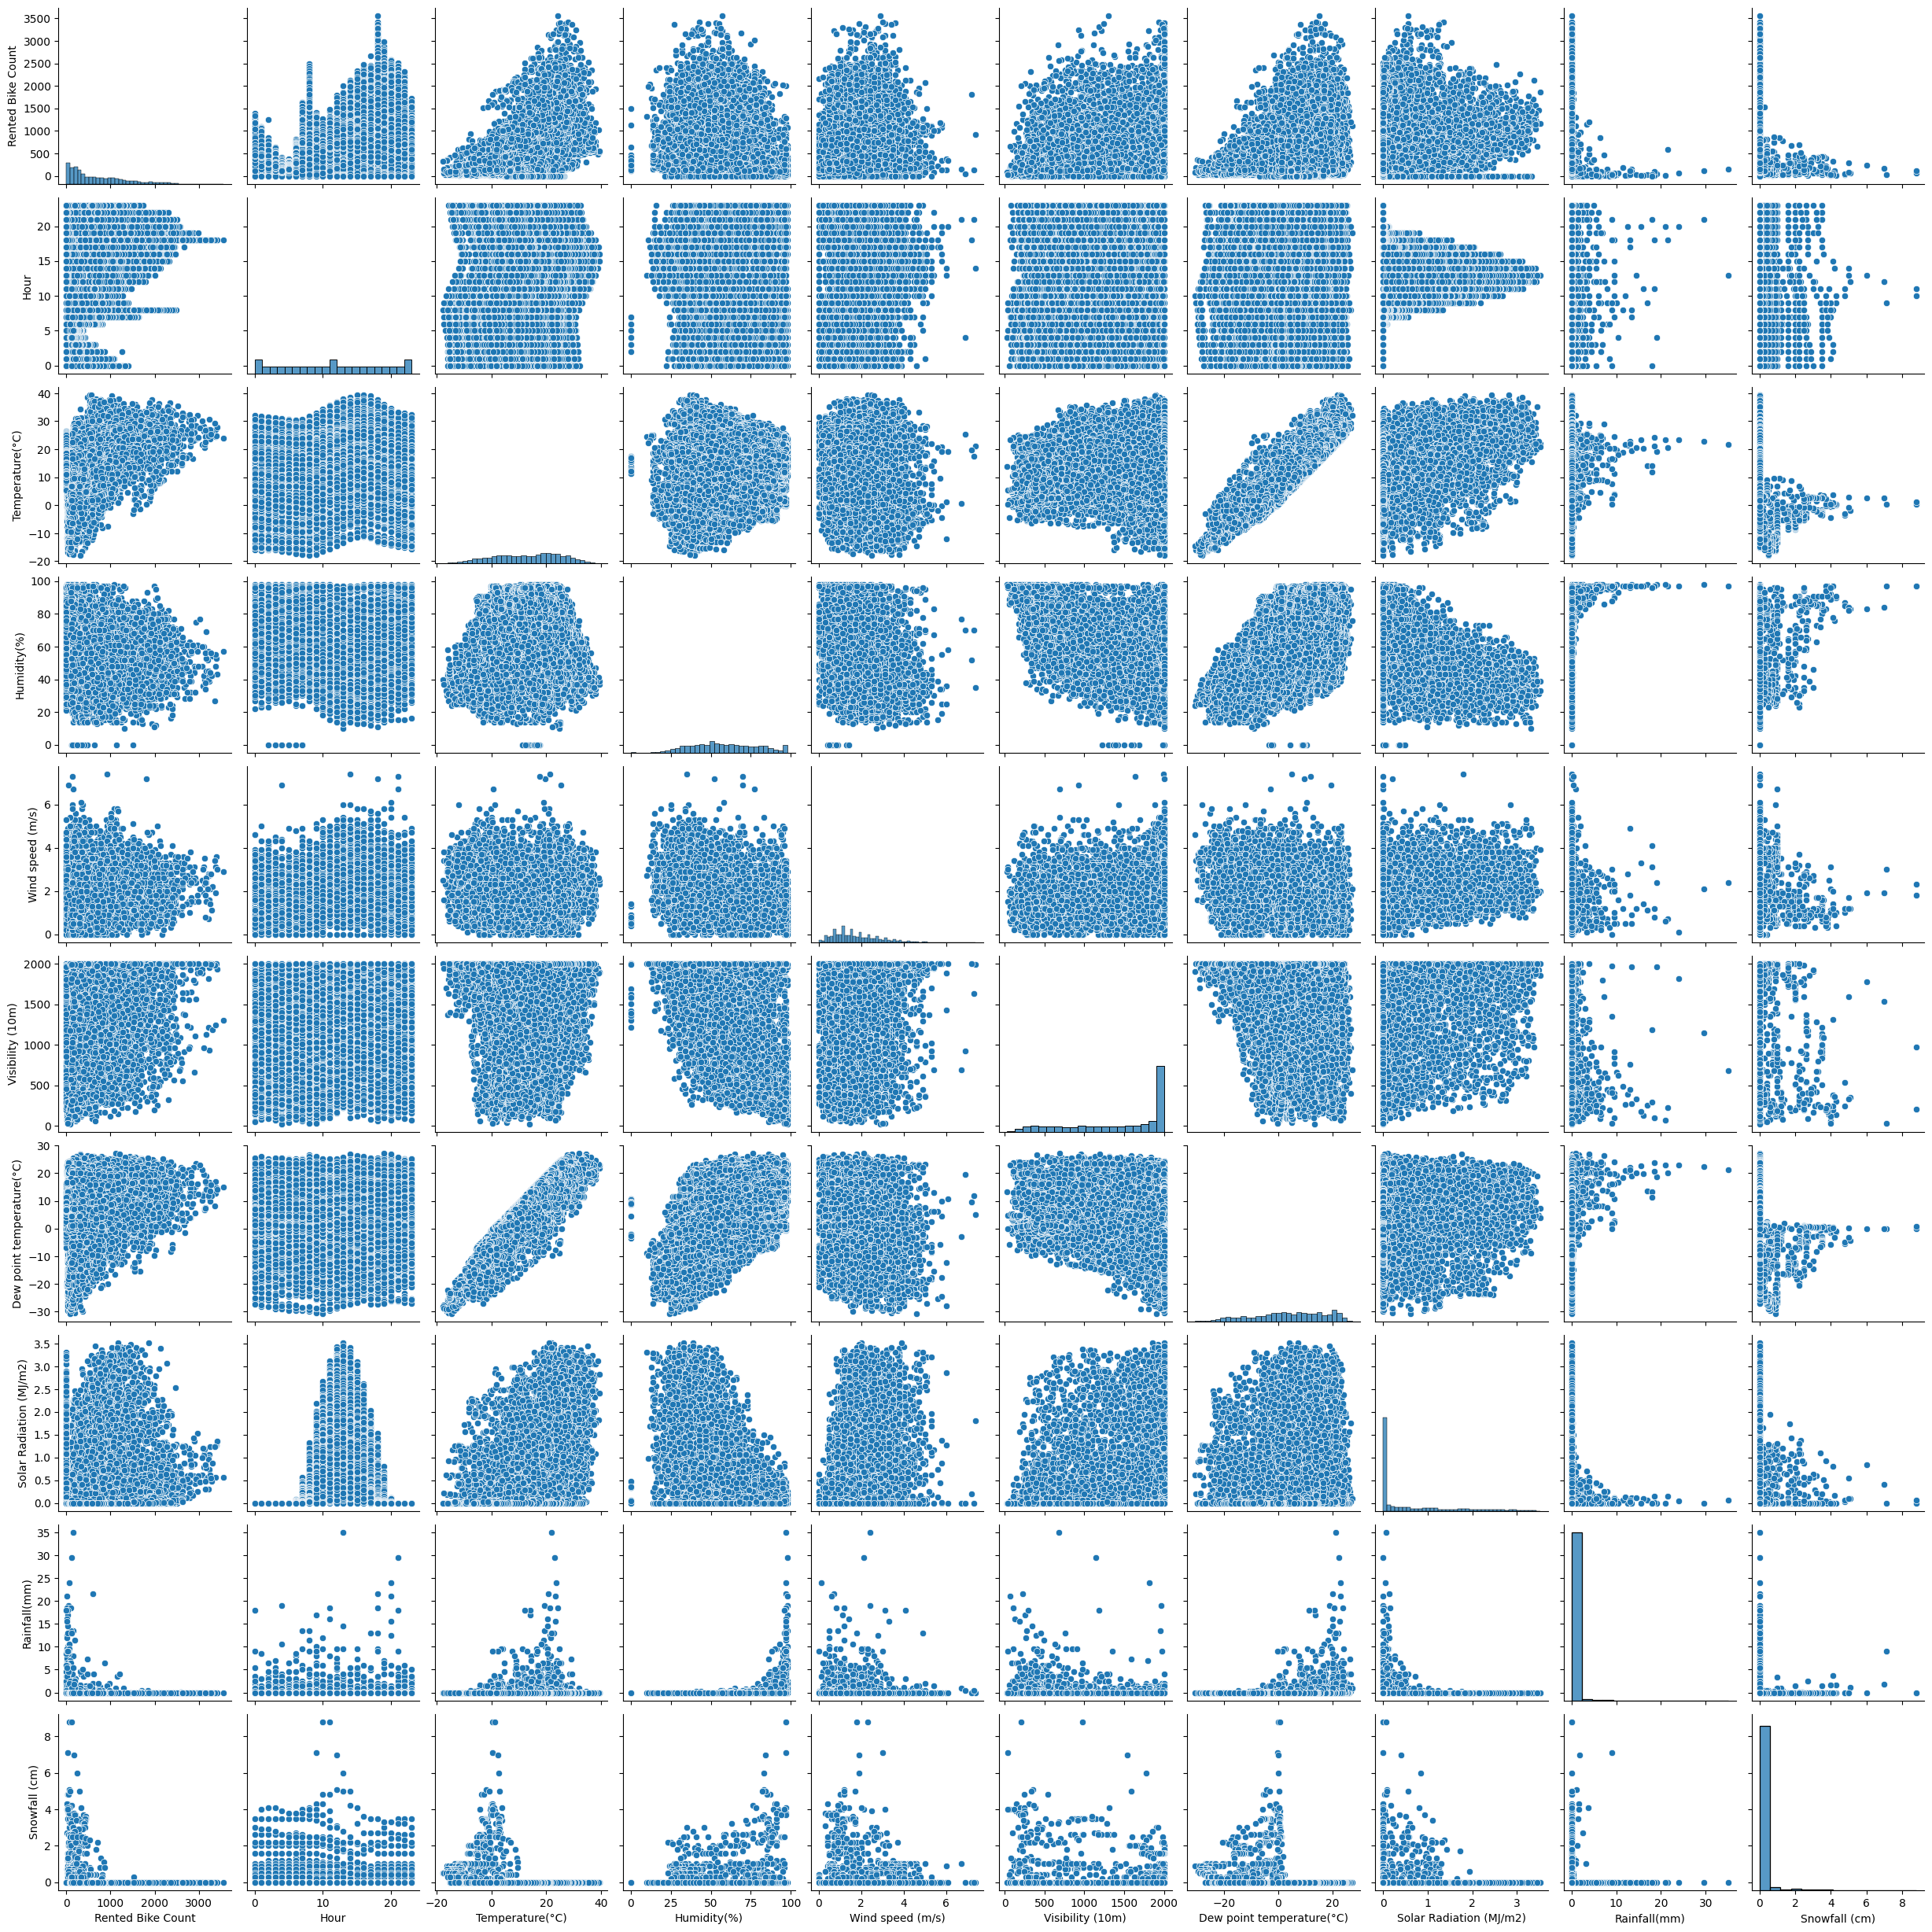

In [ ]:
sns.pairplot(df)   #finding relationship each variable
plt.show()

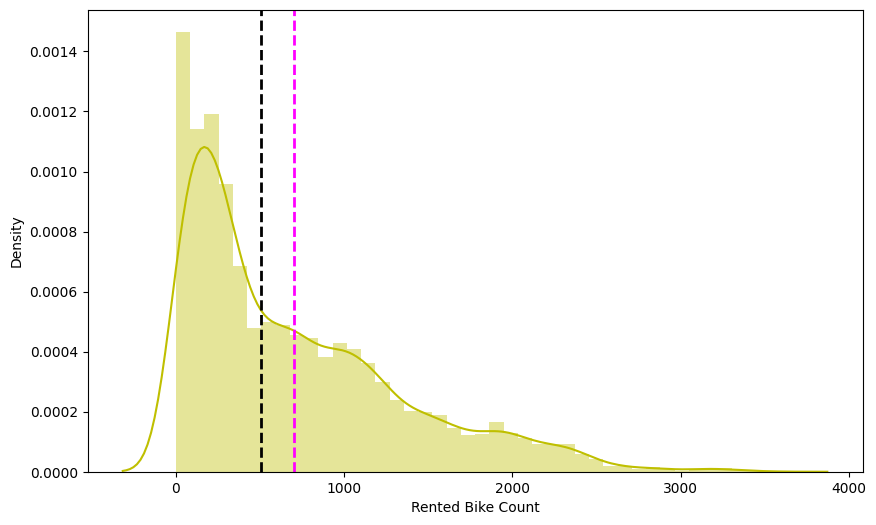

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented Bike Count'],hist=True ,color="y")
ax.axvline(df['Rented Bike Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()


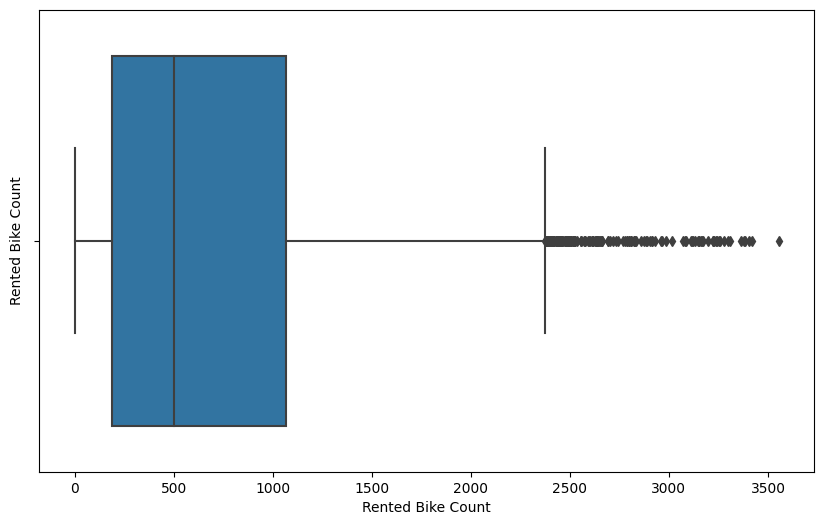

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=df['Rented Bike Count'])
plt.show()

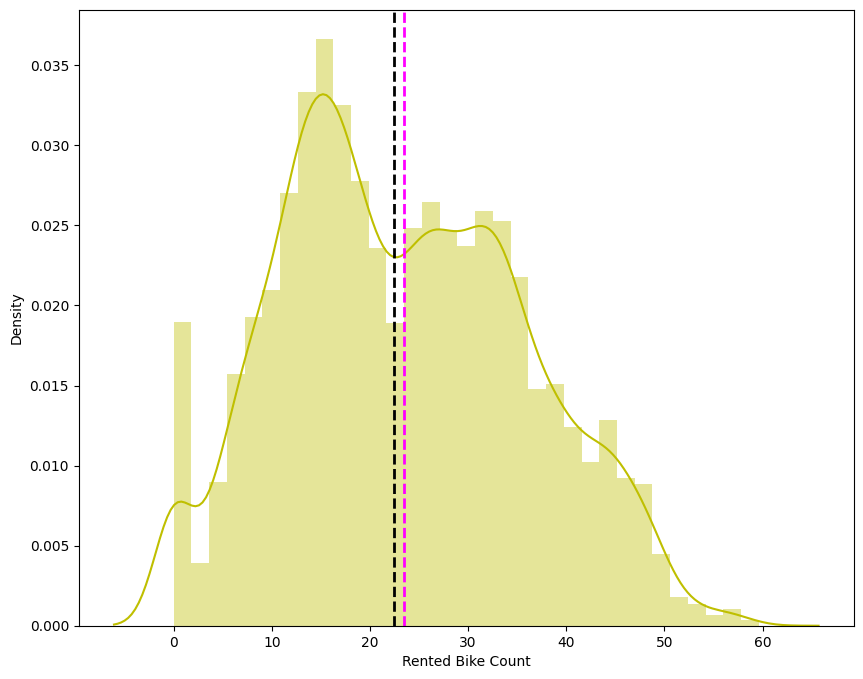

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented Bike Count']), color="y")
ax.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

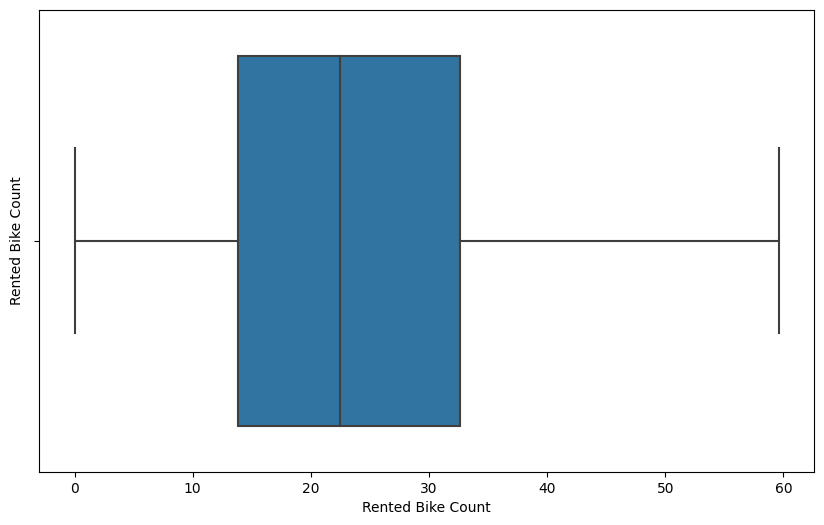

In [ ]:
# After applying sqrt on Rented Bike Count check whether we still have outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']))
plt.show()

<Axes: >

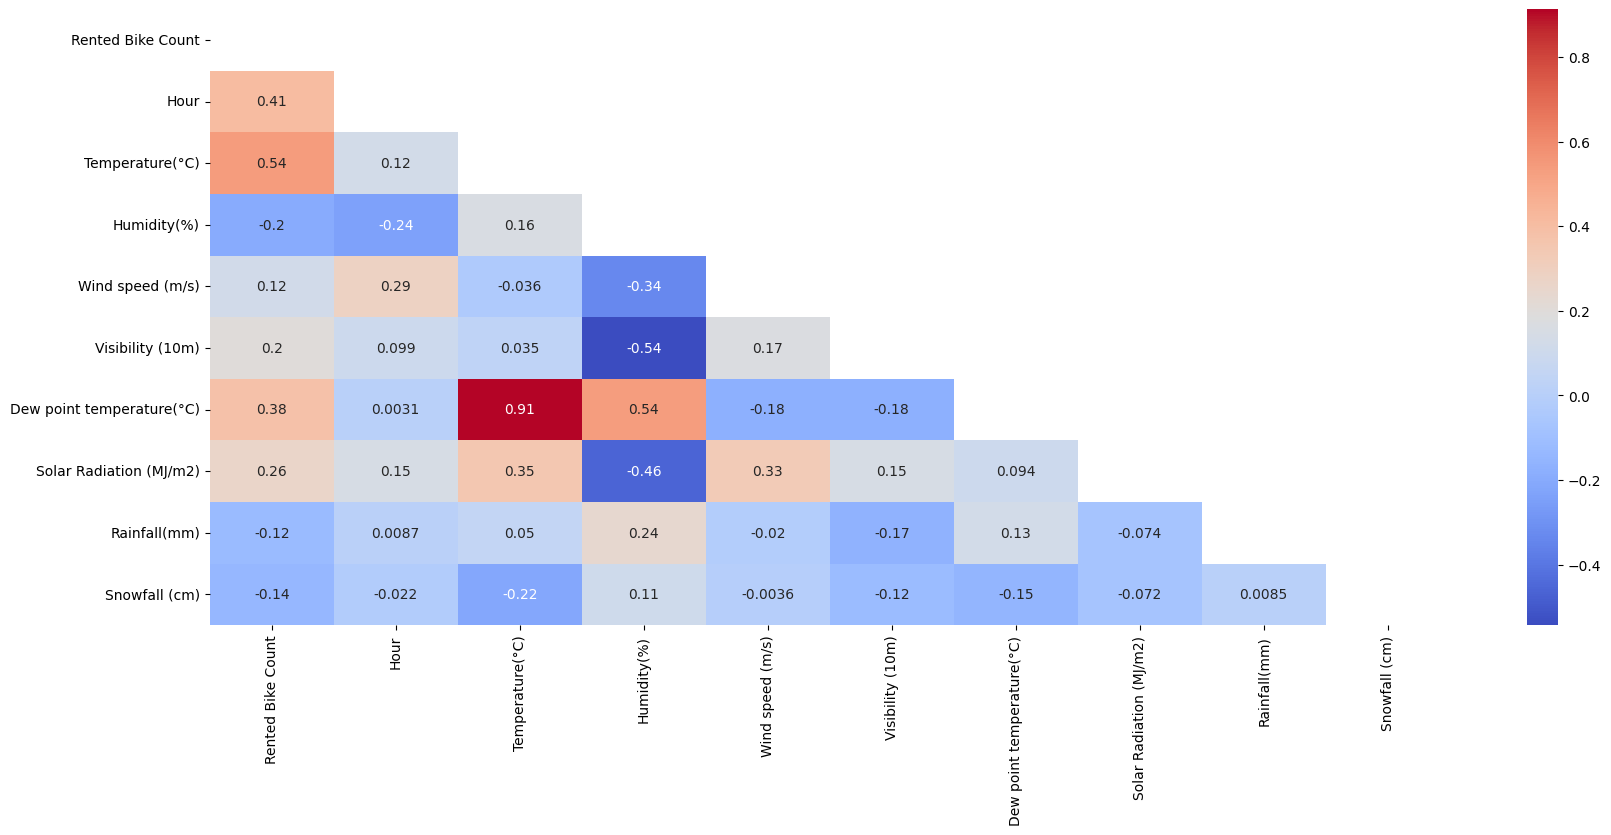

In [ ]:
## plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

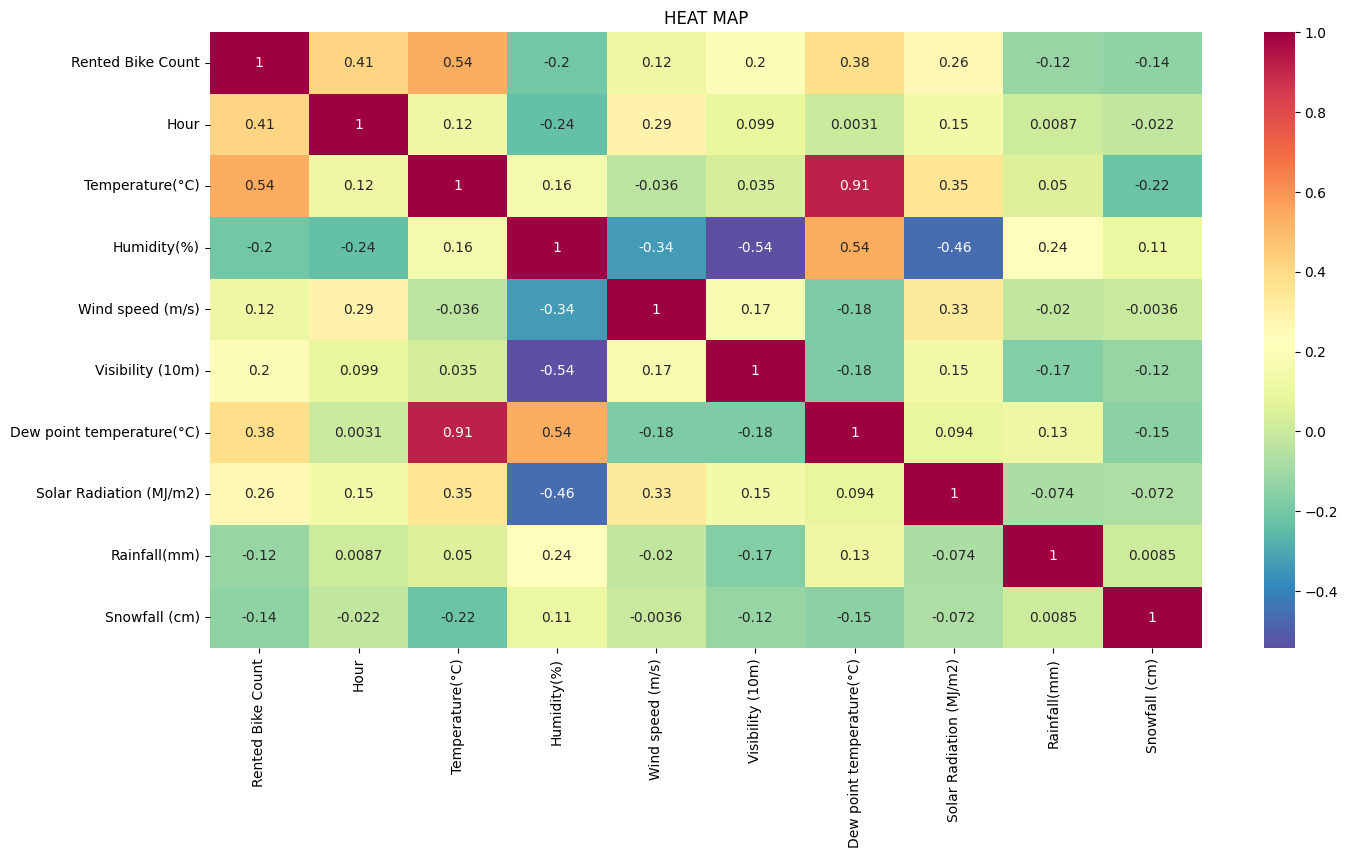

In [ ]:
# heat map showing correlationship between one variable to another variable
plt.figure (figsize= (16,8))
corelation= df.corr()
sns.heatmap(corelation, annot=True, cmap='Spectral_r')
plt.title("HEAT MAP")
plt.show()

In [ ]:
df.head(1)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# finding multicollinearity to dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["Rented Bike Count"]]])

variables        VIF
0            Temperature(°C)  29.075866
1                Humidity(%)   5.069743
2           Wind speed (m/s)   4.517664
3           Visibility (10m)   9.051931
4  Dew point temperature(°C)  15.201989
5    Solar Radiation (MJ/m2)   2.821604
6               Rainfall(mm)   1.079919
7              Snowfall (cm)   1.118903

In [ ]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["Rented Bike Count","Temperature(°C)"]]])

variables       VIF
0                Humidity(%)  5.049297
1           Wind speed (m/s)  4.265415
2           Visibility (10m)  4.623490
3  Dew point temperature(°C)  1.655311
4    Solar Radiation (MJ/m2)  1.901297
5               Rainfall(mm)  1.079157
6              Snowfall (cm)  1.111247

In [ ]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["Rented Bike Count","Temperature(°C)","Functioning Day"]]])

variables       VIF
0                Humidity(%)  5.049297
1           Wind speed (m/s)  4.265415
2           Visibility (10m)  4.623490
3  Dew point temperature(°C)  1.655311
4    Solar Radiation (MJ/m2)  1.901297
5               Rainfall(mm)  1.079157
6              Snowfall (cm)  1.111247

In [ ]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["Rented Bike Count","Temperature(°C)","Functioning Day","Holiday"]]])

variables       VIF
0                Humidity(%)  5.049297
1           Wind speed (m/s)  4.265415
2           Visibility (10m)  4.623490
3  Dew point temperature(°C)  1.655311
4    Solar Radiation (MJ/m2)  1.901297
5               Rainfall(mm)  1.079157
6              Snowfall (cm)  1.111247

In [ ]:
# selected features
numerical_features = ["Humidity(%)","Wind speed (m/s)","Visibility (10m)","Dew point temperature(°C)","Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)"]

In [ ]:
# extending of features
features = numerical_features.copy()
features.extend(["Seasons","Holiday","Functioning Day"])

In [ ]:
# importig label encoder and convert categorical to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i])
i


'weekdays_weekend'

In [ ]:
# these are selected features
features

['Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [ ]:
# copying of data in another variable
df_pr=df.copy()
df_pr

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254    0             -5.2           37               2.2   
1                   204    1             -5.5           38               0.8   
2                   173    2             -6.0           39               1.0   
3                   107    3             -6.2           40               0.9   
4                    78    4             -6.0           36               2.3   
...                 ...  ...              ...          ...               ...   
8755               1003   19              4.2           34               2.6   
8756                764   20              3.4           37               2.3   
8757                694   21              2.6           39               0.3   
8758                712   22              2.1           41               1.0   
8759                584   23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  Functioning Day month  \
0              0.0            0.0        3        1                1    12   
1              0.0            0.0        3        1                1    12   
2              0.0            0.0        3        1                1    12   
3              0.0            0.0        3        1                1    12   
4              0.0            0.0        3        1                1    12   
...            ...            ...      ...      ...              ...   ...   
8755           0.0            0.0        0        1                1    11   
8756           0.0            0.0        0        1                1    11   
8757           0.0            0.0        0        1                1    11   
8758           0.0            0.0        0        1                1    11   
8759           0.0            0.0        0        1                1    11   

     weekdays_weekend  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
8755                0  
8756                0  
8757                0  
8758                0  
8759                0  

[8760 rows x 15 columns]

In [ ]:
# all columns
df_pr.describe().columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# all features store into Variable Xdf_pr[features]
X=df_pr[features]
X

Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0              37               2.2              2000   
1              38               0.8              2000   
2              39               1.0              2000   
3              40               0.9              2000   
4              36               2.3              2000   
...           ...               ...               ...   
8755           34               2.6              1894   
8756           37               2.3              2000   
8757           39               0.3              1968   
8758           41               1.0              1859   
8759           43               1.3              1909   

      Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                         -17.6                      0.0           0.0   
1                         -17.6                      0.0           0.0   
2                         -17.7                      0.0           0.0   
3                         -17.6                      0.0           0.0   
4                         -18.6                      0.0           0.0   
...                         ...                      ...           ...   
8755                      -10.3                      0.0           0.0   
8756                       -9.9                      0.0           0.0   
8757                       -9.9                      0.0           0.0   
8758                       -9.8                      0.0           0.0   
8759                       -9.3                      0.0           0.0   

      Snowfall (cm)  Seasons  Holiday  Functioning Day  
0               0.0        3        1                1  
1               0.0        3        1                1  
2               0.0        3        1                1  
3               0.0        3        1                1  
4               0.0        3        1                1  
...             ...      ...      ...              ...  
8755            0.0        0        1                1  
8756            0.0        0        1                1  
8757            0.0        0        1                1  
8758            0.0        0        1                1  
8759            0.0        0        1                1  

[8760 rows x 10 columns]

In [ ]:
from sklearn.preprocessing import RobustScaler
# Scalling of features
scaler = RobustScaler()
# Sclaing
X= scaler.fit_transform(X)

In [ ]:
X

array([[-0.625     ,  0.5       ,  0.28490566, ...,  2.        ,
         0.        ,  0.        ],
       [-0.59375   , -0.5       ,  0.28490566, ...,  2.        ,
         0.        ,  0.        ],
       [-0.5625    , -0.35714286,  0.28490566, ...,  2.        ,
         0.        ,  0.        ],
       ...,
       [-0.5625    , -0.85714286,  0.25471698, ..., -1.        ,
         0.        ,  0.        ],
       [-0.5       , -0.35714286,  0.15188679, ..., -1.        ,
         0.        ,  0.        ],
       [-0.4375    , -0.14285714,  0.1990566 , ..., -1.        ,
         0.        ,  0.        ]])

In [ ]:
#dependent_variable=['Rented Bike Count']
#y=df_pr[dependent_variable].values # or

y = df_pr["Rented Bike Count"]
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

###   **TRAINING THE MODEL**

In [ ]:
# importing necessary liabraries
from sklearn.model_selection import train_test_split
import math

In [ ]:
#Assign the value in X and Y
X = df_pr.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df_pr['Rented Bike Count'])


In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
print(X_train.shape) # shape of X , y
print(y_train.shape)

(7008, 14)
(7008,)


In [ ]:
print(X_test.shape) # shape of X , y
print(y_test.shape)

(1752, 14)
(1752,)


### **LINEAR REGRESSION**

In [ ]:
# importing necessary libraries for
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
# defining metrics

def print_metrics(actual, predicted):
    print('MSE is {}'.format(mean_squared_error(actual, predicted)))
    print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
    print('MAE is {}'.format(mean_absolute_error(actual, predicted)))

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_ # intercept of linear regression B0

-0.448008162658315

In [ ]:
regressor.coef_       # coefficents of linear regression like B1,B2,B3,B4......

array([ 4.98651325e-01,  1.75353055e-01, -2.51667705e-01,  1.16795429e-01,
        1.22507926e-04,  3.91871579e-01, -7.23908634e-01, -1.59868263e+00,
        4.87220928e-02, -2.00846587e+00,  3.44011964e+00,  2.91720177e+01,
        1.72956835e-01, -1.41954847e+00])

In [ ]:

# Validating Assumptions
y_train_pred_lr = regressor.predict(X_train)
y_test_pred_lr = regressor.predict(X_test)

In [ ]:
print(y_test_pred_lr) # predicted values of y_test

[29.10228643 34.51118819 37.68859305 ... 27.79045244  6.97133746
 37.23397255]


In [ ]:
# actual y values
print(y_test)

6056    41.569219
5556    28.670542
5990    25.651511
7674    52.115257
3319    32.908965
          ...    
8307    11.045361
100      6.480741
6605    13.379088
1783    17.146428
6013    25.942244
Name: Rented Bike Count, Length: 1752, dtype: float64


In [ ]:
# comparison  actual y_test values, and  y_predicted_values

pd.DataFrame ({"Actual_Values":y_test, "Predicted_values":y_test_pred_lr,"Error_value":(y_test-y_test_pred_lr)})

Actual_Values  Predicted_values  Error_value
6056      41.569219         29.102286    12.466933
5556      28.670542         34.511188    -5.840646
5990      25.651511         37.688593   -12.037082
7674      52.115257         36.444229    15.671028
3319      32.908965         21.600161    11.308805
...             ...               ...          ...
8307      11.045361         19.718907    -8.673546
100        6.480741         12.990797    -6.510056
6605      13.379088         27.790452   -14.411364
1783      17.146428          6.971337    10.175091
6013      25.942244         37.233973   -11.291729

[1752 rows x 3 columns]

In [ ]:
# Evaluation of training Data
print_metrics(y_train, y_train_pred_lr)


#Find R-squared value
r2 = r2_score(y_train, y_train_pred_lr)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_train, y_train_pred_lr))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 52.809015856389166
RMSE is 7.266981206552633
MAE is 5.568261495705092
r2:0.6599164138793988
Adj_r2:0.6592355658591373


In [ ]:
# Test dataset metrics
print_metrics(y_test, y_test_pred_lr)

# evaluating test data
 #Find R-squared value
r2 = r2_score(y_test, y_test_pred_lr)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_test_pred_lr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

MSE is 54.95739526405663
RMSE is 7.413325519903778
MAE is 5.641285420871126
r2:0.642940406547512
Adj_r2:0.6400625514477222


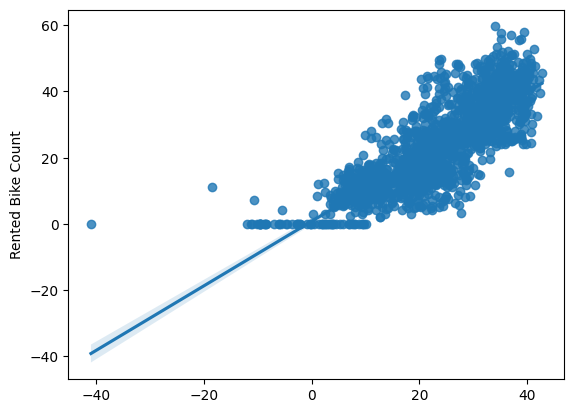

In [ ]:
sns.regplot( y=y_test,x=y_test_pred_lr);

# **LASSO REGRESSION**

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))


0.47722155286113055 0.4710305329278486


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 82.1396801086802
RMSE : 9.063094400296192
MAE : 6.7074115711988345
R2 : 0.4710305329278486
Adjusted R2 : 0.46676710601995564


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)}
training_df=training_df.append(dict1,ignore_index=True)

NameError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 80.46427622106054
RMSE : 8.970188193179704
MAE : 6.609067094748057
R2 : 0.47722155286113055
Adjusted R2 : 0.4730080247897753


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

NameError: ignored

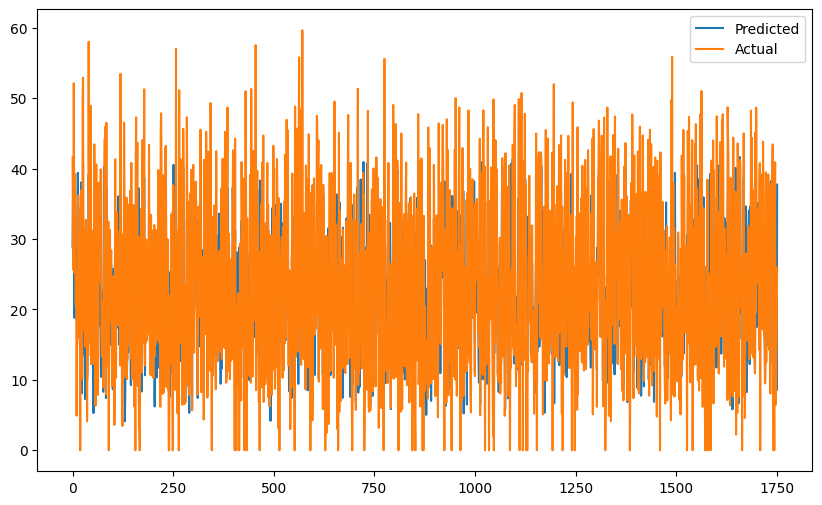

In [ ]:
#Plot the figure
plt.figure(figsize=(10,6))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

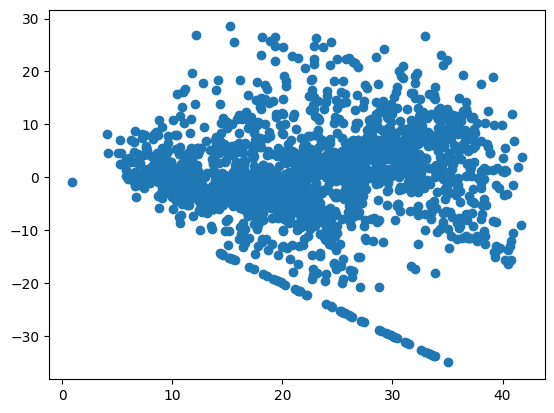

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

### RIDGE REGRESSION

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [ ]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#check the score
ridge.score(X_train, y_train)


0.6599163773082555

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 52.80902153524627
RMSE : 7.266981597282759
MAE : 5.568290246921303
R2 : 0.6599163773082555
Adjusted R2 : 0.6571753463827031


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)


NameError: ignored

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 54.95612514298177
RMSE : 7.413239854677695
MAE : 5.641241982570458
R2 : 0.642948658556408
Adjusted R2 : 0.6400708699667648


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)


NameError: ignored

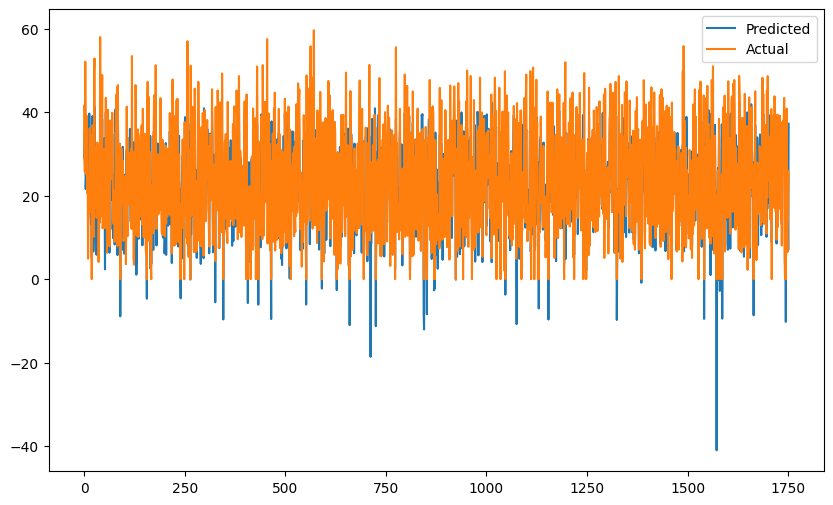

In [ ]:
#Plot the figure
plt.figure(figsize=(10,6))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

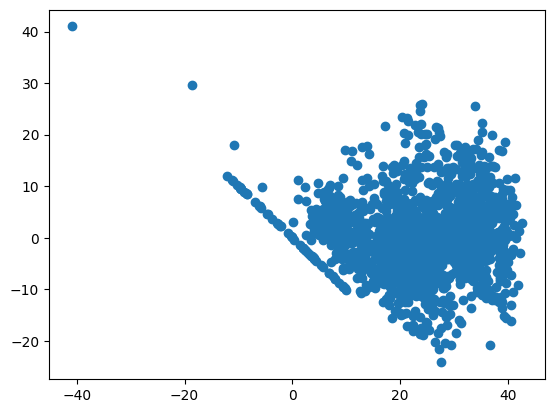

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))


### **DECISION TREE**

In [ ]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.873667890553092
MSE : 19.61716073114744
RMSE : 4.429126407221569
MAE : 3.210947670263387
R2 : 0.873667890553092
Adjusted R2 : 0.8726496697515626


In [ ]:
 #storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)}
training_df=training_df.append(dict1,ignore_index=True)


NameError: ignored

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 24.998581475726645
RMSE : 4.999858145560396
MAE : 3.51658213085361
R2 : 0.837583580958946
Adjusted R2 : 0.8362745251923515


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)}
test_df=test_df.append(dict2,ignore_index=True)


NameError: ignored

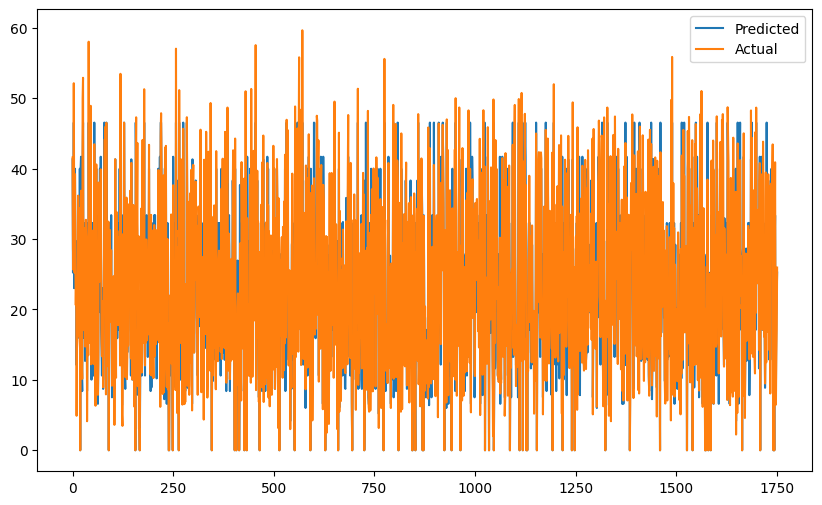

In [ ]:
#Plot the figure
plt.figure(figsize=(10,6))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

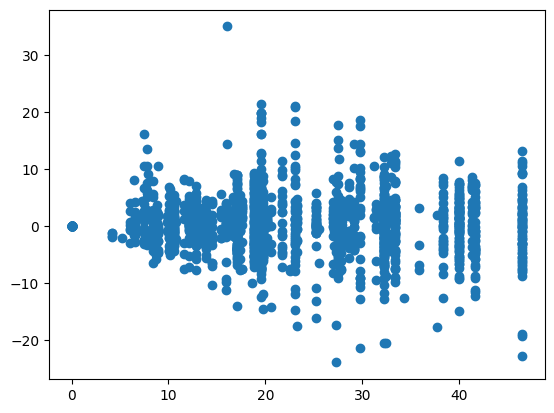

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

### **RANDOM FOREST**

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9917714835857936
MSE : 1.2777442708990003
RMSE : 1.1303735094644602
MAE : 0.7135915860147495
R2 : 0.9917714835857936
Adjusted R2 : 0.9917051627856791


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)


NameError: ignored

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 8.693569498022836
RMSE : 2.948485967072395
MAE : 1.8854745367358643
R2 : 0.9435176580749425
Adjusted R2 : 0.9430624175528062


In [ ]:
from sklearn.linear_model import Ridge

# Create a Ridge Regression model with a specified regularization strength (alpha)
ridge_model = Ridge(alpha=0.1)  # Adjust the alpha value as needed

# Fit the model to your training data
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)
y_pred


array([29.1019076 , 34.51092907, 37.68834711, ..., 27.78937262,
        6.97149363, 37.23365635])

In [ ]:
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 8.693569498022836
RMSE : 2.948485967072395
MAE : 1.8854745367358643
R2 : 0.9435176580749425
Adjusted R2 : 0.9430624175528062


In [ ]:
df_test=[]
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)


NameError: ignored

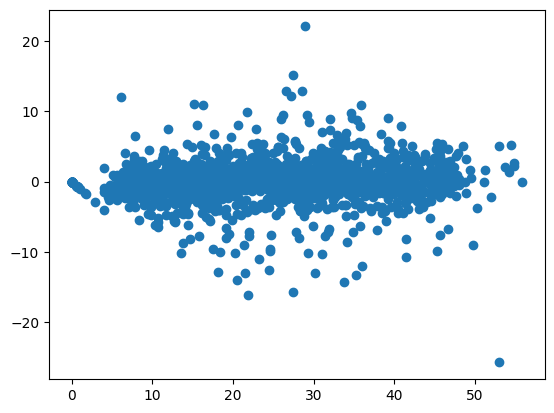

In [ ]:
# Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

In [ ]:
rf_model.feature_importances_


array([0.2426371 , 0.26686658, 0.08623923, 0.00932811, 0.01014761,
       0.01921583, 0.04799977, 0.0599444 , 0.00164102, 0.05115621,
       0.00441949, 0.16195967, 0.01742526, 0.02101972])

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
1             Temperature(°C)                0.27
0                        Hour                0.24
11            Functioning Day                0.16
2                 Humidity(%)                0.09
7                Rainfall(mm)                0.06
6     Solar Radiation (MJ/m2)                0.05
9                     Seasons                0.05
5   Dew point temperature(°C)                0.02
12                      month                0.02
13           weekdays_weekend                0.02
3            Wind speed (m/s)                0.01
4            Visibility (10m)                0.01
8               Snowfall (cm)                0.00
10                    Holiday                0.00

In [ ]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

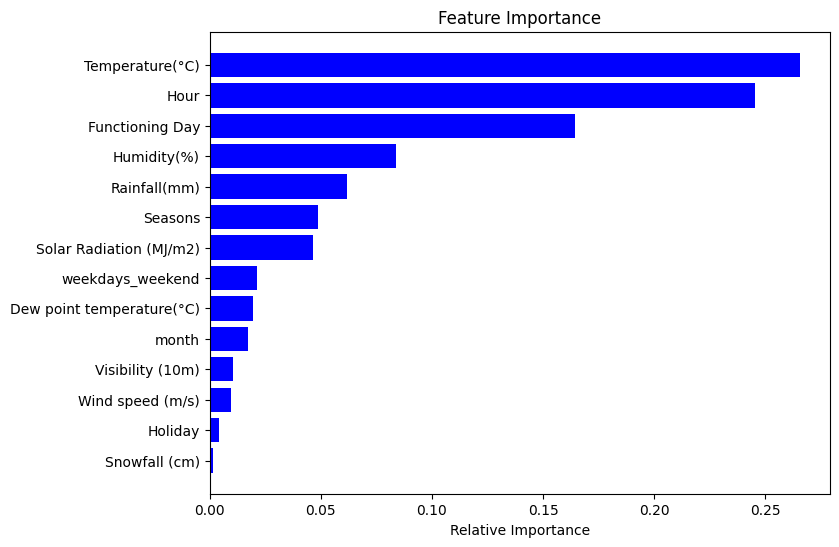

In [ ]:
#Plot the figure
plt.figure(figsize=(8,6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

NameError: ignored

In [ ]:
#Getting all the columns
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekdays_weekend'],
      dtype='object')